In [36]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

In [19]:
train_df=pd.read_csv("cleaned_data")

In [20]:
train_df.shape

(617, 58)

In [21]:
train_df.columns

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'Class'],
      dtype='object')

In [22]:
X=train_df.iloc[:,1:57]

In [23]:
X.columns

Index(['AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN', 'BP',
       'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS', 'CU',
       'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY', 'EB',
       'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI', 'FL',
       'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL'],
      dtype='object')

In [24]:
y=train_df.iloc[:,57]

In [25]:
y

0      1
1      0
2      0
3      0
4      1
      ..
612    0
613    0
614    0
615    0
616    0
Name: Class, Length: 617, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [29]:
sc=MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
model = RandomForestClassifier()

In [31]:
model.fit(X_train, y_train)
print('Accuracy:', model.score(X_test, y_test))

Accuracy: 0.9516129032258065


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

# Create a classification report for the model.
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Create a confusion matrix for the model.
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       101
           1       0.95      0.78      0.86        23

    accuracy                           0.95       124
   macro avg       0.95      0.89      0.91       124
weighted avg       0.95      0.95      0.95       124

Confusion Matrix:
[[100   1]
 [  5  18]]


The model achieved an accuracy of 95% on the test set, with high precision, recall, and F1-scores for class 0. However, the model had a lower recall for class 1, indicating that it may have difficulty correctly identifying instances of class 1 compared to class 0.

In [33]:
model.feature_importances_


array([0.03785424, 0.02776087, 0.00585705, 0.01689947, 0.00415546,
       0.0134025 , 0.0054517 , 0.00722389, 0.02785126, 0.00965986,
       0.01256035, 0.00918296, 0.03033911, 0.01228851, 0.00447512,
       0.01094598, 0.01817722, 0.01301184, 0.01078018, 0.00979403,
       0.00450703, 0.03988336, 0.00722355, 0.01452111, 0.00519729,
       0.05674687, 0.02387407, 0.00550902, 0.01566522, 0.04403054,
       0.01866842, 0.00895431, 0.09909917, 0.00192368, 0.0117348 ,
       0.00925626, 0.02424497, 0.01078277, 0.03889644, 0.00098199,
       0.00819618, 0.00989974, 0.00776917, 0.00967686, 0.02192297,
       0.02274487, 0.01192677, 0.04403716, 0.03676762, 0.00795424,
       0.01061909, 0.00549946, 0.01320575, 0.01271812, 0.00788379,
       0.03980576])

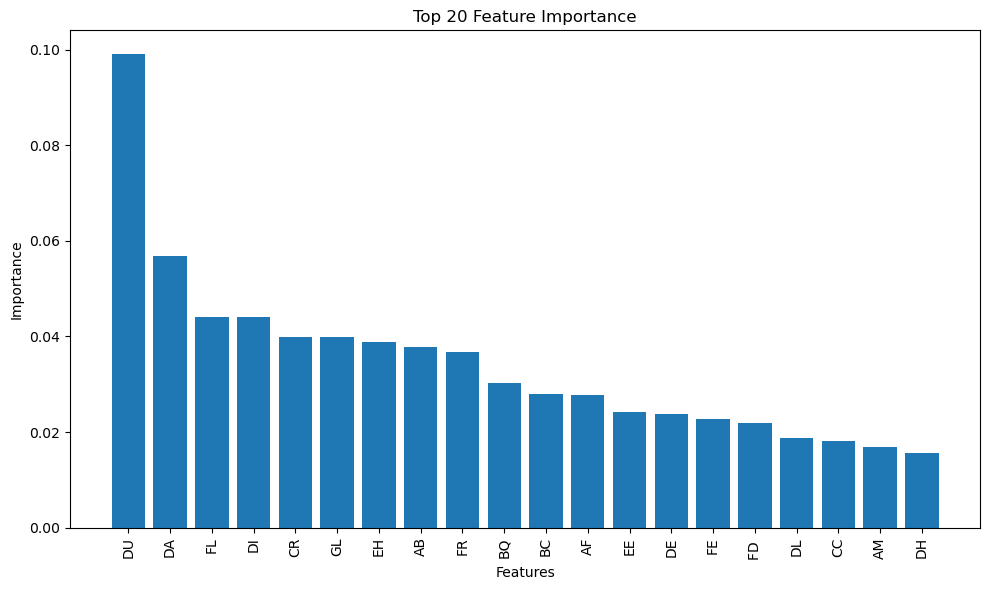

In [37]:
# Get the feature importances.
importances = model.feature_importances_

# Get the indices of the top 20 features.
top_indices = importances.argsort()[::-1][:20]

# Get the names of the top 20 features.
top_feature_names = X.columns[top_indices]

# Get the importances of the top 20 features.
top_importances = importances[top_indices]

plt.figure(figsize = (10, 6))
plt.bar(range(len(top_feature_names)), top_importances)
plt.xticks(range(len(top_feature_names)), top_feature_names, rotation = 90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 20 Feature Importance')
plt.tight_layout()
plt.show()